# Sieci neuronowe i Deep Learning
# Temat 6: PyTorch dla bardziej zaawansowanych

## Zadanie 6.1

Na przykładzie problemu XOR porównać działanie sieci MLP o różnych architekturach (o różnej głębokości i szerokości).

- Przeanalizować, co się dzieje, gdy dokładamy kolejne warstwy ukryte (jedną, dwie, trzy i cztery) o tej samej wielkości, na przykład z 4, 10 neuronami.

- Przeanalizować, co się dzieje, gdy zwiększamy szerokość ukrytych warstw (dla jednej ukrytej warstwy i dla dwóch ukrytych warstw).

- Przy której ze strategii będziemy w stanie osiągać dobre wyniki predykcyjne dla możliwie małej (o małej liczbie parametrów) sieci neuronowej?

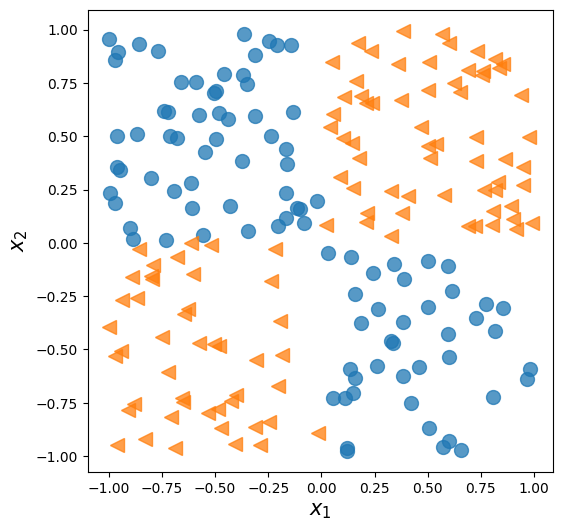

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


np.random.seed(1)
torch.manual_seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)

plt.show()

In [2]:
# Przygotowanie danych pod budowę sieci neuronwych:
from torch.utils.data import DataLoader, TensorDataset

train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [3]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [4]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [5]:
torch.manual_seed(1)

num_epochs = 200

def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

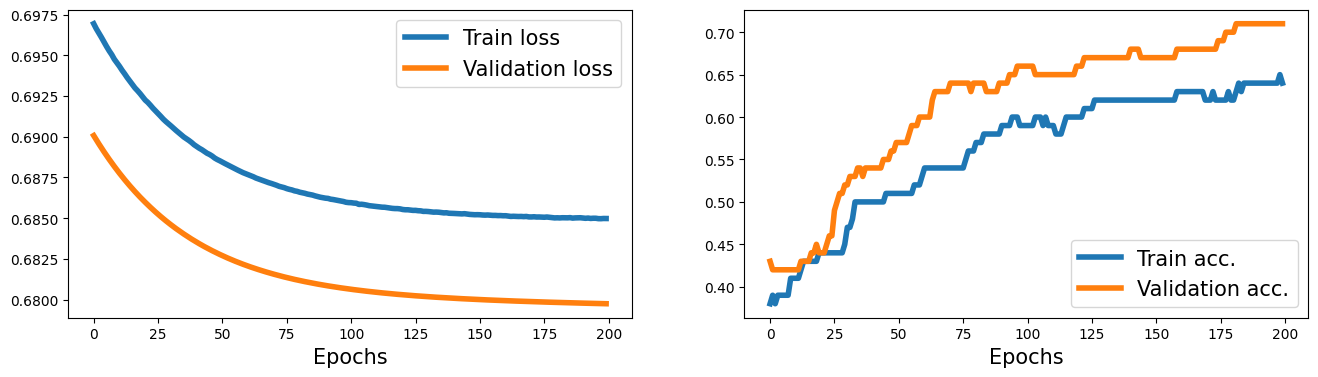

In [6]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

Trained 1_hidden_layer_4_neurons with learning rate 0.01
Train loss: 0.20130175892263652, Validation loss: 0.23854969441890717
Train accuracy: 0.9700000286102295, Validation accuracy: 0.9800000190734863
Trained 1_hidden_layer_4_neurons with learning rate 0.005
Train loss: 0.13391013353131712, Validation loss: 0.1723727434873581
Train accuracy: 0.9800000190734863, Validation accuracy: 0.9900000095367432
Trained 1_hidden_layer_4_neurons with learning rate 0.002
Train loss: 0.1193890437495429, Validation loss: 0.15723532438278198
Train accuracy: 0.9800000190734863, Validation accuracy: 0.9900000095367432
Trained 1_hidden_layer_4_neurons with learning rate 0.001
Train loss: 0.11345554633648135, Validation loss: 0.15071962773799896
Train accuracy: 0.9800000190734863, Validation accuracy: 0.9900000095367432
Trained 1_hidden_layer_400_neurons with learning rate 0.01
Train loss: 0.05367728160674232, Validation loss: 0.11537490785121918
Train accuracy: 1.0, Validation accuracy: 0.95999997854232

Text(0.5, 0, 'Epochs')

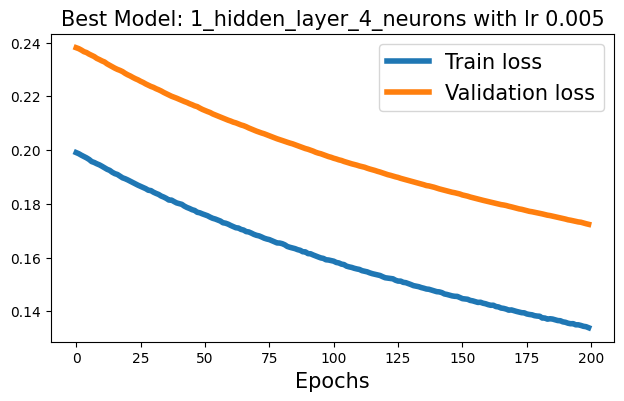

In [ ]:
# Define MLPs with different architectures
models = {
    "1_hidden_layer_4_neurons": nn.Sequential(
        nn.Linear(2, 4),
        nn.ReLU(),
        nn.Linear(4, 1),
        nn.Sigmoid()
    ),
    "1_hidden_layer_400_neurons": nn.Sequential(
        nn.Linear(2, 400),
        nn.ReLU(),
        nn.Linear(400, 1),
        nn.Sigmoid()
    ),
    "2_hidden_layers_4_neurons": nn.Sequential(
        nn.Linear(2, 4),
        nn.ReLU(),
        nn.Linear(4, 4),
        nn.ReLU(),
        nn.Linear(4, 1),
        nn.Sigmoid()
    ),
    "2_hidden_layers_400_neurons": nn.Sequential(
        nn.Linear(2, 400),
        nn.ReLU(),
        nn.Linear(400, 400),
        nn.ReLU(),
        nn.Linear(400, 1),
        nn.Sigmoid()
    ),
    "3_hidden_layers_4_neurons": nn.Sequential(
        nn.Linear(2, 4),
        nn.ReLU(),
        nn.Linear(4, 4),
        nn.ReLU(),
        nn.Linear(4, 4),
        nn.ReLU(),
        nn.Linear(4, 1),
        nn.Sigmoid()
    ),
    "4_hidden_layers_4_neurons": nn.Sequential(
        nn.Linear(2, 4),
        nn.ReLU(),
        nn.Linear(4, 4),
        nn.ReLU(),
        nn.Linear(4, 4),
        nn.ReLU(),
        nn.Linear(4, 4),
        nn.ReLU(),
        nn.Linear(4, 1),
        nn.Sigmoid()
    ),
    "1_hidden_layer_10_neurons": nn.Sequential(
        nn.Linear(2, 10),
        nn.ReLU(),
        nn.Linear(10, 1),
        nn.Sigmoid()
    ),
    "2_hidden_layers_10_neurons": nn.Sequential(
        nn.Linear(2, 10),
        nn.ReLU(),
        nn.Linear(10, 10),
        nn.ReLU(),
        nn.Linear(10, 1),
        nn.Sigmoid()
    ),
    "3_hidden_layers_10_neurons": nn.Sequential(
        nn.Linear(2, 10),
        nn.ReLU(),
        nn.Linear(10, 10),
        nn.ReLU(),
        nn.Linear(10, 10),
        nn.ReLU(),
        nn.Linear(10, 1),
        nn.Sigmoid()
    ),
    "4_hidden_layers_10_neurons": nn.Sequential(
        nn.Linear(2, 10),
        nn.ReLU(),
        nn.Linear(10, 10),
        nn.ReLU(),
        nn.Linear(10, 10),
        nn.ReLU(),
        nn.Linear(10, 10),
        nn.ReLU(),
        nn.Linear(10, 1),
        nn.Sigmoid()
    )
}


loss_fn = nn.BCELoss()
optimizers = {}

learning_rates = [0.01, 0.005, 0.002, 0.001]
for lr in learning_rates:
    for model_name, model in models.items():
        optimizers[f"{model_name}_lr_{lr}"] = torch.optim.SGD(model.parameters(), lr=lr)

# Train each model with different learning rates
history_dict = {}
for model_name, model in models.items():
    for lr in learning_rates:
        optimizer = optimizers[f"{model_name}_lr_{lr}"]
        history = train(model, num_epochs, train_dl, x_valid, y_valid)
        history_dict[f"{model_name}_lr_{lr}"] = history
        print(f"Trained {model_name} with learning rate {lr}")
        print(f"Train loss: {history[0][-1]}, Validation loss: {history[1][-1]}")
        print(f"Train accuracy: {history[2][-1]}, Validation accuracy: {history[3][-1]}")


Text(0.5, 0, 'Epochs')

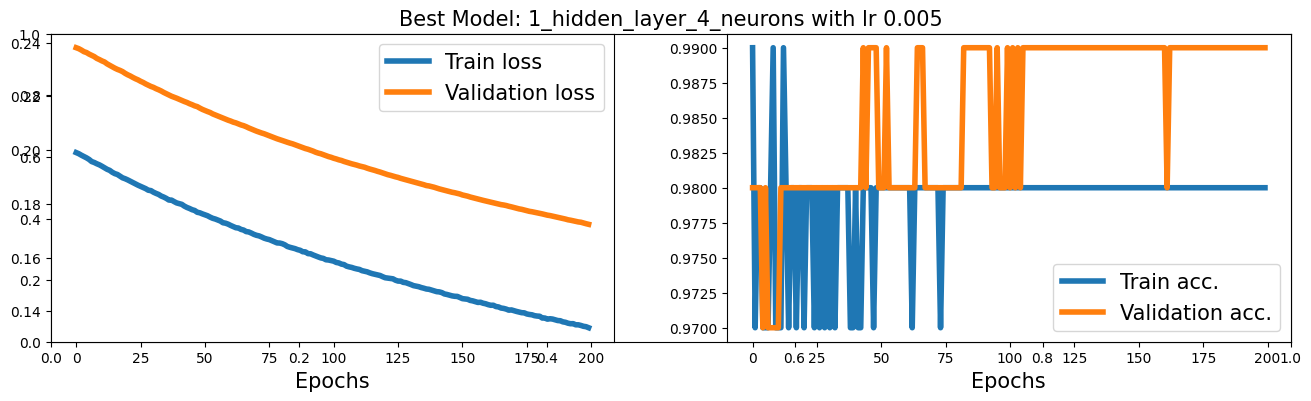

In [ ]:
# pick the best model based on validation accuracy
best_model_name = None
best_lr = None
best_accuracy = 0.0
best_history = None
for key, history in history_dict.items():
    if history[3][-1] > best_accuracy:
        best_accuracy = history[3][-1]
        best_model_name, best_lr = key.split("_lr_")
        best_history = history
        best_model = models[best_model_name]


# plotting the best model
fig = plt.figure(figsize=(16, 4))
plt.title(f"Best Model: {best_model_name} with lr {best_lr}", size=15)
ax = fig.add_subplot(1, 2, 1)
plt.plot(best_history[0], lw=4)
plt.plot(best_history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(best_history[2], lw=4)
plt.plot(best_history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

## Zadanie 6.2*

Wykorzystując klasę `nn.Module`,
zdefiniować niestandardową warstwę, która mnoży dane wejściowe przez stałą wartość (skalowanie), która jest (uczonym) parametrem modelu.

Zmodyfikować wybraną sieć (z tych zbudowanych podczas jednych z poprzednich zajęć), uwzględniając w niej zdefiniowaną warstwę.